In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import matplotlib.pyplot as plt
import torch

In [23]:
import bnn.functions
import bnn.network

In [24]:
dims = [32]*5 + [64]*10 + [128]*10 + [64]*10 + [32]*5
dims = [d*2 for d in dims]
TBNN = bnn.network.TernBinNetwork(*dims, bit_shift=3)

In [25]:
samples = 1

input = bnn.functions.binarise.apply(torch.randn(samples, dims[0]))
desired = bnn.functions.binarise.apply(torch.randn(samples, dims[-1]))

In [26]:
output = TBNN(input)

In [27]:
loss = torch.abs(output - desired).sum()

In [28]:
loss.backward()

In [29]:
vars = [] 
grad_vars = []

for layer in TBNN.layers:
    vars.append(layer.W.var().detach())
    grad_vars.append(layer.W.grad.var().detach())

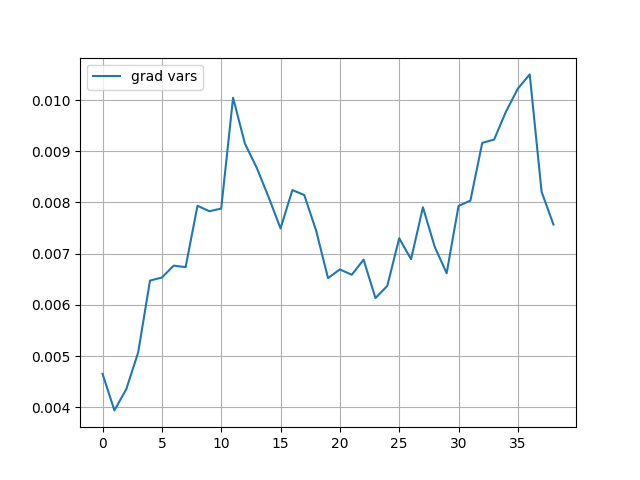

In [30]:
plt.close()
#plt.plot(vars, label="vars")
plt.plot(grad_vars, label="grad vars")
plt.legend()
plt.grid()
plt.show()